In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
from datetime import datetime
import numpy as np
import os


font = {'size': 13}
plt.rc('font', **font)


path = os.path.abspath("C:/Users/steve/Google Drive/Master/Masterarbet/Evaluation/graphics/disruption")


dataVM1WithBoth = pd.read_csv('DataVM1WithMTDBothActive.txt')
dataVM2WithBoth = pd.read_csv('DataVM2WithMTDBothActive.txt')

dataVM1WithBoth = dataVM1WithBoth.iloc[1200:2900]
dataVM2WithBoth = dataVM2WithBoth.iloc[1200:2800]

dataVM1WithBoth = dataVM1WithBoth.reset_index(drop=True)
dataVM2WithBoth = dataVM2WithBoth.reset_index(drop=True)

print(dataVM1WithBoth)
print(dataVM2WithBoth)

          time  cpu   ram
0     12:12:34  0.0  9940
1     12:12:35  0.0  9940
2     12:12:36  0.0  9940
3     12:12:37  0.0  9940
4     12:12:38  0.0  9940
...        ...  ...   ...
1695  12:41:59  0.0  9940
1696  12:42:00  0.0  9940
1697  12:42:01  0.0  9940
1698  12:42:02  0.0  9940
1699  12:42:03  0.0  9940

[1700 rows x 3 columns]
          time  cpu   ram
0     12:12:21  0.0  9968
1     12:12:22  0.0  9968
2     12:12:23  0.0  9968
3     12:12:24  0.0  9968
4     12:12:25  0.0  9968
...        ...  ...   ...
1595  12:41:02  0.0  9968
1596  12:41:03  0.0  9968
1597  12:41:04  0.0  9968
1598  12:41:05  0.0  9968
1599  12:41:06  0.0  9968

[1600 rows x 3 columns]


In [2]:

def replaceTimeWithSeconds(df):
    startTime = df.iloc[0]["time"]
    print(startTime)

    for index, row in df.iterrows():
        if index == df.index[0]:
            df.at[index,"time"] = 0
        else:
            newTime = pd.to_datetime(df.iloc[index]["time"]) - pd.to_datetime(startTime)
            newTime = newTime.total_seconds()
            df.at[index, "time"] = newTime

    print(df)
    return df
    
dataVM1WithBoth = replaceTimeWithSeconds(dataVM1WithBoth)
dataVM2WithBoth = replaceTimeWithSeconds(dataVM2WithBoth)

    

12:12:34
      time  cpu   ram
0        0  0.0  9940
1        1  0.0  9940
2        2  0.0  9940
3        3  0.0  9940
4        4  0.0  9940
...    ...  ...   ...
1695  1765  0.0  9940
1696  1766  0.0  9940
1697  1767  0.0  9940
1698  1768  0.0  9940
1699  1769  0.0  9940

[1700 rows x 3 columns]
12:12:21
      time  cpu   ram
0        0  0.0  9968
1        1  0.0  9968
2        2  0.0  9968
3        3  0.0  9968
4        4  0.0  9968
...    ...  ...   ...
1595  1721  0.0  9968
1596  1722  0.0  9968
1597  1723  0.0  9968
1598  1724  0.0  9968
1599  1725  0.0  9968

[1600 rows x 3 columns]


      time  cpu   ram
0        0  0.0  9940
1        1  0.0  9940
2        2  0.0  9940
3        3  0.0  9940
4        4  0.0  9940
...    ...  ...   ...
1695  1765  0.0  9940
1696  1766  0.0  9940
1697  1767  0.0  9940
1698  1768  0.0  9940
1699  1769  0.0  9940

[1700 rows x 3 columns]
      time  cpu   ram
0        0  0.0  9968
1        1  0.0  9968
2        2  0.0  9968
3        3  0.0  9968
4        4  0.0  9968
...    ...  ...   ...
1595  1721  0.0  9968
1596  1722  0.0  9968
1597  1723  0.0  9968
1598  1724  0.0  9968
1599  1725  0.0  9968

[1600 rows x 3 columns]


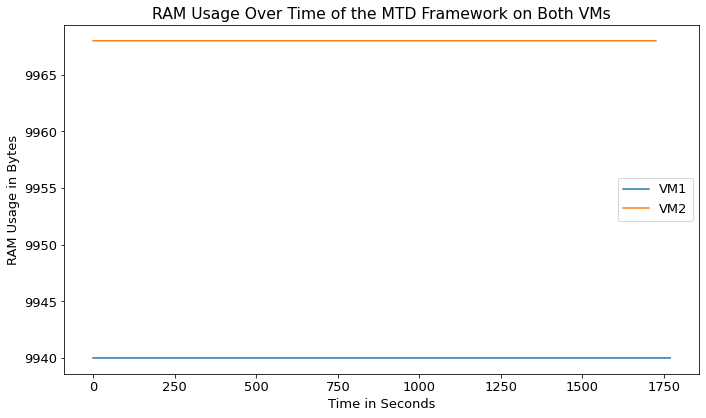

In [3]:
print(dataVM1WithBoth)
print(dataVM2WithBoth)

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(dataVM1WithBoth['time'], dataVM1WithBoth['ram'],label='VM1')
plt.plot(dataVM2WithBoth['time'], dataVM2WithBoth['ram'],label='VM2')
plt.xlabel('Time in Seconds')
plt.ylabel('RAM Usage in Bytes')


#plt.ylim(0, 15000)

plt.legend()
plt.title('RAM Usage in Bytes Over Time of the MTD Framework on Both VMs')
plt.tight_layout()
filename = "RAMUSageBoth.png"
plt.savefig(os.path.join(path,filename),dpi= 800)

plt.show()